In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [11]:
data = pd.read_csv("./california_housing_train.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


Общая статистика по датасету:
          longitude      latitude  housing_median_age   total_rooms  \
count  1.700000e+04  1.700000e+04        1.700000e+04  1.700000e+04   
mean   1.337492e-16  1.337492e-17       -3.427324e-17  3.343731e-18   
std    1.000029e+00  1.000029e+00        1.000029e+00  1.000029e+00   
min   -2.387848e+00 -1.443531e+00       -2.191968e+00 -1.211838e+00   
25%   -1.111108e+00 -7.931704e-01       -8.413218e-01 -5.420770e-01   
50%    5.346887e-01 -6.434471e-01        3.262582e-02 -2.370147e-01   
75%    7.790646e-01  9.801141e-01        6.682241e-01  2.328499e-01   
max    2.619365e+00  2.959268e+00        1.859971e+00  1.619047e+01   

       total_bedrooms    population    households  median_income  \
count    1.700000e+04  1.700000e+04  1.700000e+04   1.700000e+04   
mean     1.170306e-17 -3.343731e-18  1.504679e-17  -3.343731e-18   
std      1.000029e+00  1.000029e+00  1.000029e+00   1.000029e+00   
min     -1.277408e+00 -1.242856e+00 -1.300935e+00  -1.7733

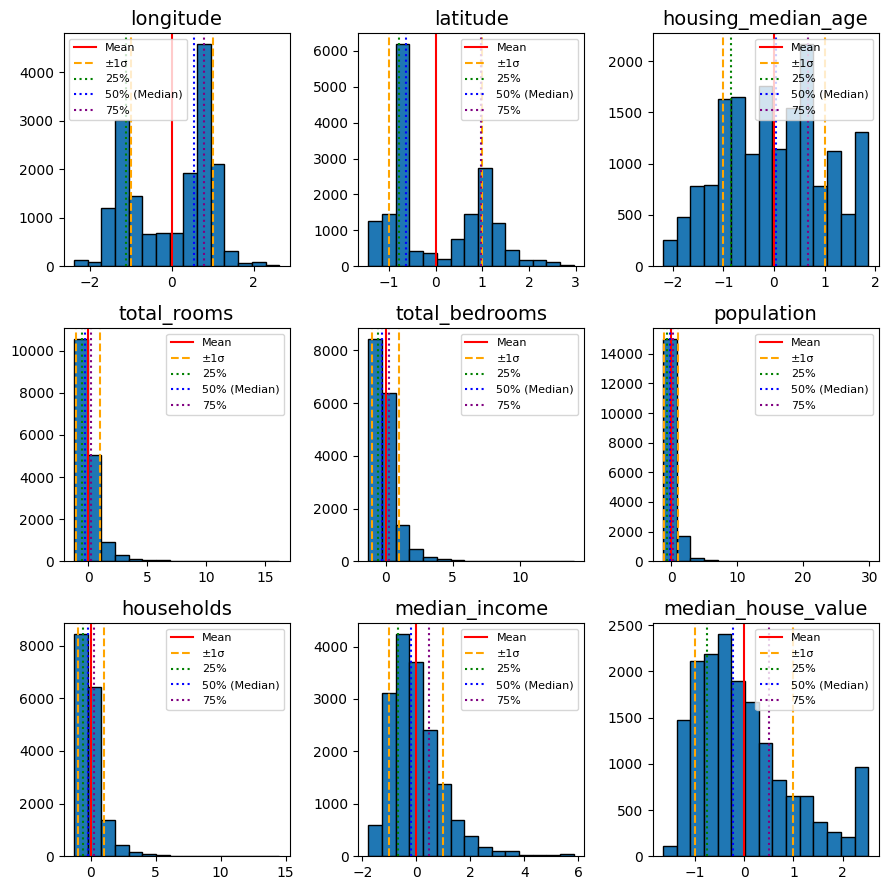

In [22]:
X = data.drop(columns=["median_house_value"])
y = data["median_house_value"]
rows_count = X.shape[0]
cols_count = X.shape[1]

means = data.mean(axis=0)
corrected_dispersions = np.sum(np.power(data - means, 2), axis=0) / (rows_count - 1)
standart_offsets = np.sqrt(corrected_dispersions)
mins = data.min(axis=0)
maxs = data.max(axis=0)

print("Общая статистика по датасету:")
print(data.describe())

quantiles = data.quantile([0.25, 0.5, 0.75])

bins_count = 1 + int(math.log(rows_count, 2))
data_from = X.join(y)
titles = data_from.columns

fig = plt.figure(figsize=(9, 9))

for i, column in enumerate(titles):
    ax = fig.add_subplot(3, 3, i + 1)
    hist = ax.hist(data_from[column], bins=bins_count, edgecolor="black")

    ax.axvline(x=means.iloc[i], color="red", label="Mean")
    ax.axvline(x=means.iloc[i] - standart_offsets.iloc[i], color="orange", linestyle="--", label="±1σ")
    ax.axvline(x=means.iloc[i] + standart_offsets.iloc[i], color="orange", linestyle="--")

    ax.axvline(x=quantiles.loc[0.25, column], color="green", linestyle=":", label="25%")
    ax.axvline(x=quantiles.loc[0.5, column], color="blue", linestyle=":", label="50% (Median)")
    ax.axvline(x=quantiles.loc[0.75, column], color="purple", linestyle=":", label="75%")

    ax.set_title(titles[i], fontsize=14)
    ax.legend(fontsize=8)

fig.tight_layout()
plt.show()


In [16]:
print("Количество пропусков в каждом столбце:")
print(data.isna().sum())

data = data.fillna(data.mean(numeric_only=True))

for col in data.select_dtypes(include=["object"]).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

data = pd.get_dummies(data, drop_first=True)

scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=["number"]).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print("Предварительная обработка завершена!")
print(f"Размер обработанного набора данных: {data.shape}")


Количество пропусков в каждом столбце:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
Предварительная обработка завершена!
Размер обработанного набора данных: (17000, 9)


В результате предварительной обработки был получен очищенный и нормализованный набор данных размером 17000×9, полностью готовый для проведения дальнейшего анализа и построения моделей.
Данные не содержат пропусков и находятся в едином масштабе, что обеспечивает корректность и устойчивость последующих вычислений.

In [17]:
train_ratio = 0.8
train_size = int(len(data) * train_ratio)

train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

X_train = train_data.drop(columns=["median_house_value"])
y_train = train_data["median_house_value"]

X_test = test_data.drop(columns=["median_house_value"])
y_test = test_data["median_house_value"]

print(f"Размер обучающего набора: {X_train.shape[0]} объектов")
print(f"Размер тестового набора: {X_test.shape[0]} объектов")


Размер обучающего набора: 13600 объектов
Размер тестового набора: 3400 объектов


In [21]:
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train.values])
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test.values])

XTX_inv = np.linalg.inv(X_train_bias.T @ X_train_bias)
w = XTX_inv @ X_train_bias.T @ y_train.values

y_pred_train = X_train_bias @ w
y_pred_test = X_test_bias @ w

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

mse_train = mse(y_train, y_pred_train)
mse_test = mse(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

coef_names = ["bias"] + list(X_train.columns)
print("Коэффициенты линейной регрессии:")
print(pd.Series(w, index=coef_names))

print("Качество модели:")
print(f"На обучающей выборке: R² = {r2_train:.4f}, MSE = {mse_train:.2f}")
print(f"На тестовой выборке:  R² = {r2_test:.4f}, MSE = {mse_test:.2f}")


Коэффициенты линейной регрессии:
bias                 -0.016095
longitude            -0.695383
latitude             -0.756122
housing_median_age    0.106732
total_rooms          -0.157117
total_bedrooms        0.427739
population           -0.352381
households            0.111788
median_income         0.656424
dtype: float64
Качество модели:
На обучающей выборке: R² = 0.6203, MSE = 0.35
На тестовой выборке:  R² = 0.6558, MSE = 0.42


In [24]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res / ss_tot

def linear_regression(X, y):
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X.values])
    w = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y.values
    y_pred = X_bias @ w
    return w, y_pred

feature_sets = {
    "Model_1": ["median_income"],
    "Model_2": ["median_income", "housing_median_age", "total_rooms"],
    "Model_3": ["median_income", "housing_median_age", "total_rooms", "total_bedrooms",
                "population", "households", "longitude", "latitude"]
}

results = []

for name, features in feature_sets.items():
    X_train = train_data[features]
    X_test = test_data[features]

    w, y_pred_train = linear_regression(X_train, y_train)
    _, y_pred_test = linear_regression(X_test, y_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    results.append({
        "Model": name,
        "Features": features,
        "R2_train": r2_train,
        "R2_test": r2_test,
        "Coefficients": w
    })

for res in results:
    print(f"\n=== {res['Model']} ===")
    print(f"Признаки: {res['Features']}")
    print(f"R² на обучающей выборке: {res['R2_train']:.4f}")
    print(f"R² на тестовой выборке:    {res['R2_test']:.4f}")
    print(f"Коэффициенты: {res['Coefficients']}")



=== Model_1 ===
Признаки: ['median_income']
R² на обучающей выборке: 0.4690
R² на тестовой выборке:    0.5036
Коэффициенты: [-0.05865238  0.67300672]

=== Model_2 ===
Признаки: ['median_income', 'housing_median_age', 'total_rooms']
R² на обучающей выборке: 0.4944
R² на тестовой выборке:    0.5687
Коэффициенты: [-0.04183095  0.68720195  0.17143792  0.05082007]

=== Model_3 ===
Признаки: ['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'longitude', 'latitude']
R² на обучающей выборке: 0.6203
R² на тестовой выборке:    0.6749
Коэффициенты: [-0.01609522  0.65642393  0.10673204 -0.15711715  0.42773916 -0.35238078
  0.1117884  -0.69538298 -0.75612169]
